In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
d=pd.read_csv('/content/Admission Data.csv')

In [3]:
d.head()


,Name of University,Rigor,Rank,GPA,Test Score,Essay,Recommendation,Interview,Extracurricular,Talent,Personality,First Generation,Religious,State Residency,Race,Volunteer,Work Experience,Level of Interest
0,Princeton University,3,3,3,3,3,3,1,3,3,3,1,0.0,0,1,1,1,0
1,Brown University,3,3,3,3,3,3,1,2,3,3,1,0.0,1,1,1,1,0
2,California Institute of Technology (Caltech),3,2,2,3,3,3,0,2,1,3,1,0.0,0,1,1,1,0
3,Cornell University,3,2,3,3,3,3,1,3,3,3,1,NaN,1,1,1,1,0
4,Dartmouth College,3,3,3,3,3,3,1,3,2,3,0,1.0,0,1,1,1,1


In [5]:
d.shape

(23, 18)

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name of University  23 non-null     object 
 1   Rigor               23 non-null     int64  
 2   Rank                23 non-null     int64  
 3   GPA                 23 non-null     int64  
 4   Test Score          23 non-null     int64  
 5   Essay               23 non-null     int64  
 6   Recommendation      23 non-null     int64  
 7   Interview           23 non-null     int64  
 8   Extracurricular     23 non-null     int64  
 9   Talent              23 non-null     int64  
 10  Personality         23 non-null     int64  
 11  First Generation    23 non-null     int64  
 12  Religious           22 non-null     float64
 13  State Residency     23 non-null     int64  
 14  Race                23 non-null     int64  
 15  Volunteer           23 non-null     int64  
 16  Work Exper

In [7]:
d.isnull().sum()

,0
Name of University,0
Rigor,0
Rank,0
GPA,0
Test Score,0
Essay,0
Recommendation,0
Interview,0
Extracurricular,0
Talent,0


In [8]:
d.dropna()

,Name of University,Rigor,Rank,GPA,Test Score,Essay,Recommendation,Interview,Extracurricular,Talent,Personality,First Generation,Religious,State Residency,Race,Volunteer,Work Experience,Level of Interest
0,Princeton University,3,3,3,3,3,3,1,3,3,3,1,0.0,0,1,1,1,0
1,Brown University,3,3,3,3,3,3,1,2,3,3,1,0.0,1,1,1,1,0
2,California Institute of Technology (Caltech),3,2,2,3,3,3,0,2,1,3,1,0.0,0,1,1,1,0
4,Dartmouth College,3,3,3,3,3,3,1,3,2,3,0,1.0,0,1,1,1,1
5,Harvard University,1,1,1,1,1,1,1,1,1,1,1,0.0,0,1,1,1,0
6,Massachusetts Institute of Technology (MIT),2,1,2,2,2,2,2,2,2,1,1,0.0,0,1,1,1,0
7,Stanford University,3,3,3,3,3,3,1,3,3,3,1,0.0,0,1,1,1,0
8,University of Pennsylvania,3,2,1,1,1,1,2,2,2,3,1,0.0,1,1,1,1,1
9,Washington University in St. Louis (WashU),3,3,3,3,3,3,1,2,3,3,1,0.0,0,1,2,2,1
10,Yale University,3,3,3,1,3,3,1,3,3,3,1,0.0,1,1,1,1,0


In [9]:
d.isnull().sum()

,0
Name of University,0
Rigor,0
Rank,0
GPA,0
Test Score,0
Essay,0
Recommendation,0
Interview,0
Extracurricular,0
Talent,0


In [12]:
x=d.iloc[:,[2,3,8]].values

In [13]:
print(x)

[[3 3 3]
 [3 3 2]
 [2 2 2]
 [2 3 3]
 [3 3 3]
 [1 1 1]
 [1 2 2]
 [3 3 3]
 [2 1 2]
 [3 3 2]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [3 3 2]
 [0 3 2]
 [2 2 2]
 [3 3 1]
 [3 3 2]
 [3 3 2]
 [3 3 2]
 [3 3 1]
 [3 3 1]]


In [14]:
s=[]
for i in range(1,11):
  k=KMeans(n_clusters=i,init='k-means++',random_state=42)
  k.fit(x)
  s.append(k.inertia_)

In [15]:
k=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=k.fit_predict(x)
print(y)

[0 3 1 0 0 1 1 0 1 3 0 0 0 0 3 4 1 2 3 3 3 2 2]


In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

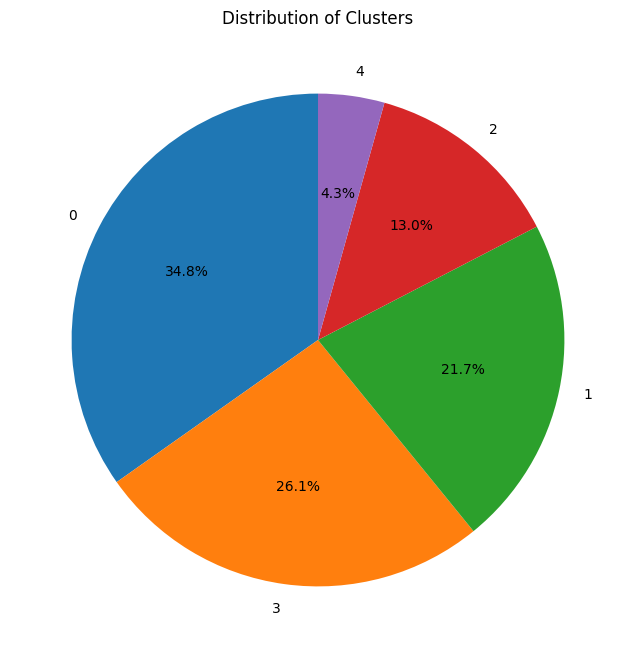

In [16]:
c = pd.Series(y).value_counts()
plt.figure(figsize=(8, 8))
plt.pie(c, labels=c.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.show()